In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.simplefilter(action= 'ignore')

In [2]:
df = pd.read_excel(r'/Users/sot/Downloads/default of credit card clients.xls' ,header= 1)
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# column names normalization

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:

# Placing the target column  as the first column in the dataset
last_column = df.columns[-1]
df = df[[last_column] + list(df.columns[:-1])]

# Dataset Dictionary and explanation

Limit_bal: Credit Amount This is the total money the bank has given to the person, in NT dollars (Taiwan's currency). It includes the person’s own credit and any credit shared with their family.

sex: Gender Tells if the person is male or female. 1 is male, and 2 is female.


education: Education Level
The person’s highest education level:
1 = Graduate school (like a master’s degree or PhD)
2 = University
3 = High school
4 = Other levels (e.g., didn’t finish high school)

marriage: Marital Status Whether the person is married or single:
1 = Married
2 = Single
3 = Other (for example, divorced)

age: Age The person’s age in years.

Payment History (pay_0 - pay_6)
These variables (pay_0 to pay_6) show if the person has paid on time in the last six months (April to September 2005). Each number tells us how long they delayed their payments:

pay_0: Repayment in September 2005
pay_2: Repayment in August 2005
And so on, until pay_6, which is April 2005.

The delay levels are:
-1 = Paid on time (no delay)
1 = Late by 1 month
2 = Late by 2 months
And so on up to 9, which means late by 9 months or more.

Amount of Each Monthly Bill (billamt_1 - billamt_6)
These variables (billamt_1 - billamt_6) show how much was due on each monthly bill:
billamt_1: Bill amount for September 2005
billamt_2: Bill amount for August 2005
And so on, until billamt_6, which is April 2005.


Amount of Each Monthly Payment (pay_amt1 - pay_amt6)
These variables (pay_amt1 - pay-amt6) show how much the person actually paid each month:
pay_amt1: Amount paid in September 2005
pay_amt2: Amount paid in August 2005
And so on, until pay_amt6, which is April 2005.
                                                                         

In [6]:

# Renaming repayment columns based on month for my personal understanding


df.rename(columns={'pay_0': 'sept_repayment', 'pay_2': 'aug_repayment','pay_3': 
                   'july_repayment', 'pay_4': 'june_repayment','pay_5': 'may_repayment',
                   'pay_6': 'april_repayment'}, inplace=True)


In [7]:
# Renaming monthly bill columns based on month

df.rename(columns={'bill_amt1': 'sept_billAmt', 'bill_amt2': 'aug_billAmt','bill_amt3': 
                   'july_billAmt', 'bill_amt4': 'june_billAmt','bill_amt5': 'may_billAmt',
                   'bill_amt6': 'april_billAmt'}, inplace=True)

In [8]:
# Renaming monthly payment columns based on month

df.rename(columns={'pay_amt1': 'sept_AmtPaid', 'pay_amt2': 'aug_AmtPaid','pay_amt3': 
                   'july_AmtPaid', 'pay_amt4': 'june_AmtPaid','pay_amt5': 'may_AmtPaid',
                   'pay_amt6': 'april_AmtPaid'}, inplace=True)

In [9]:
df

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,0,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,1,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,1,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


####  Observing features 

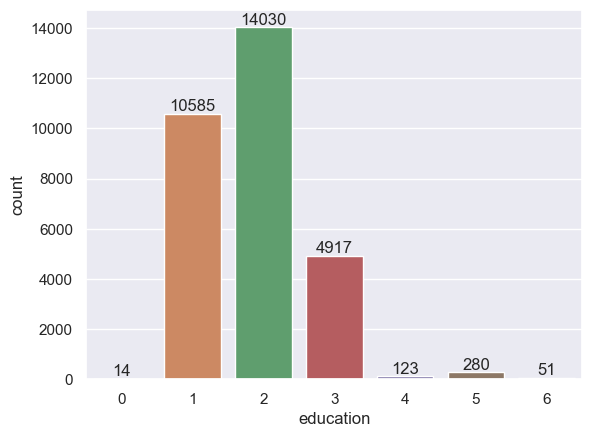

In [10]:
education_check = sns.countplot(data = df,x = 'education')

# Adding  data labels to have idea of the distribution
for p in education_check.patches:
    education_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    

In [9]:
df['education'] = df['education'].replace({5: 4, 6: 4,0: 4})

In [10]:
df['education'].value_counts()

education
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

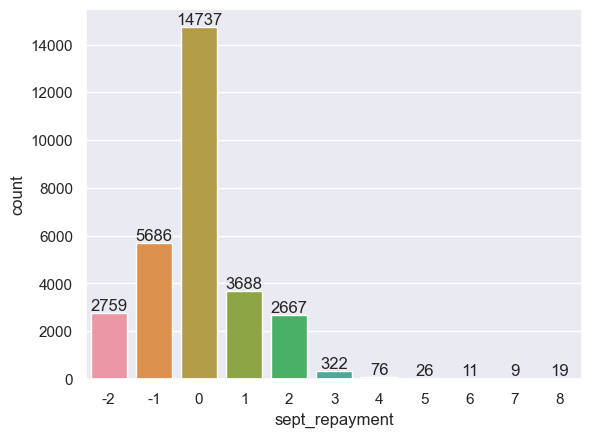

In [11]:
# Create the count plot
repayment_check = sns.countplot(data=df, x='sept_repayment')

# Adding  data labels to have idea of the distribution
for p in repayment_check.patches:
    repayment_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

In [12]:
# Mapping  -2, -1, and 0 to -1 to indicate "paid on time" and mapping all the low instances into 3
df[['sept_repayment', 'aug_repayment', 'july_repayment', 'june_repayment', 'may_repayment', 'april_repayment']] = df[['sept_repayment', 'aug_repayment', 'july_repayment', 'june_repayment', 'may_repayment', 'april_repayment']].replace({-2: -1, 0: -1,8:3,7:3,6:3,5:3,4:3})


In [13]:
df['april_repayment'].value_counts()

april_repayment
-1    26921
 2     2766
 3      313
Name: count, dtype: int64

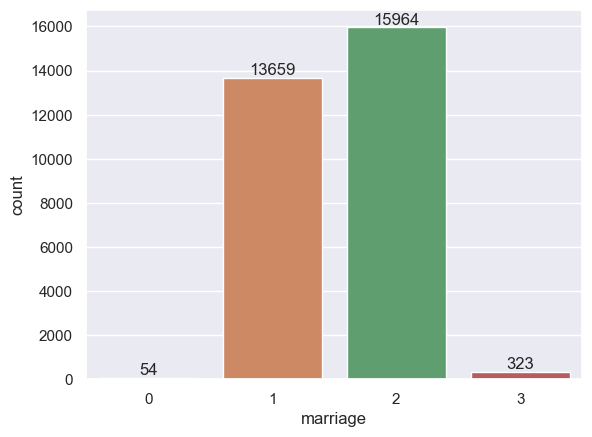

In [14]:
marriage_check = sns.countplot(data = df,x = 'marriage')

# Adding  data labels to have idea of the distribution
for p in marriage_check.patches:
    marriage_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
    
 # note that married = 1, single = 2, others (divorced, widowed) = 3

In [15]:
df['marriage'] = df['marriage'].replace({0: 3})

In [16]:
df

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
0,1,1,20000,2,2,1,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,-1,-1,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,-1,-1,-1,-1,-1,-1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,-1,-1,-1,-1,-1,-1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,-1,-1,-1,-1,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,29996,220000,1,3,1,39,-1,-1,-1,-1,-1,-1,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,0,29997,150000,1,3,2,43,-1,-1,-1,-1,-1,-1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,1,29998,30000,1,2,2,37,3,3,2,-1,-1,-1,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,1,29999,80000,1,3,1,41,1,-1,-1,-1,-1,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# WEEK 1: Exploratory Data Analysis and Data Preprocessing

### Section 1: EDA

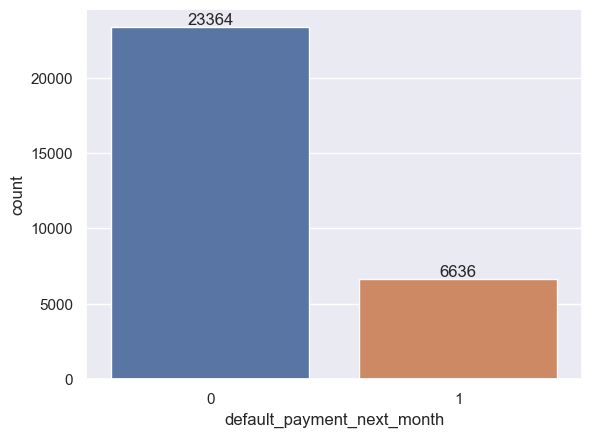

In [17]:


# Create the count plot
target_check = sns.countplot(data=df, x='default_payment_next_month')

# Adding  data labels to have idea of the distribution
for p in target_check.patches:
    target_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

    
## note that DEFAULT = 1 and NO DEFAULT = 0

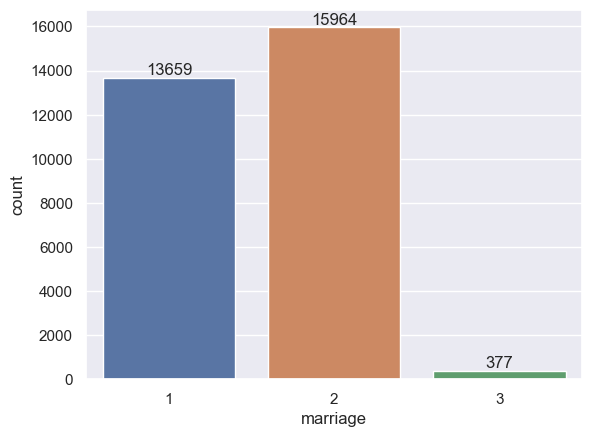

In [18]:
marriage_check = sns.countplot(data = df,x = 'marriage')

# Adding  data labels to have idea of the distribution
for p in marriage_check.patches:
    marriage_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
    
 # note that married = 1, single = 2, others (divorced, widowed) = 3   

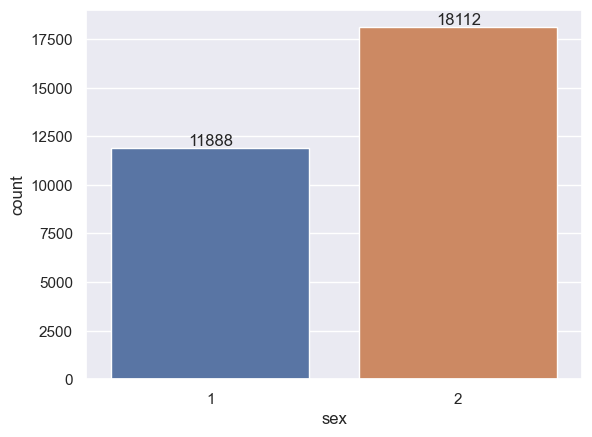

In [19]:
gender_check = sns.countplot(data = df,x = 'sex')

# Adding  data labels to have idea of the distribution
for p in gender_check.patches:
    gender_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
# note that MALE = 1 and FEMALE = 2

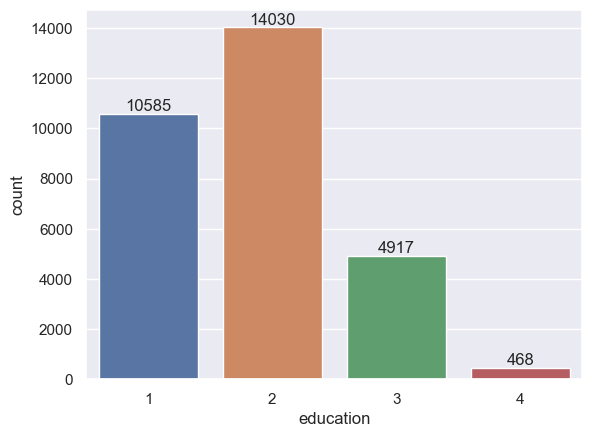

In [20]:
education_check = sns.countplot(data = df,x = 'education')

# Adding  data labels to have idea of the distribution
for p in education_check.patches:
    education_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
    
# note that 1 = Graduate school (master’s degree or PhD), university = 2, high school = 3 and other level = 4   

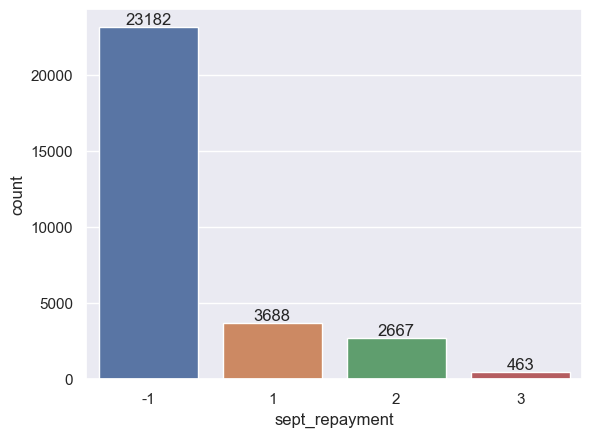

In [21]:
# Create the count plot
repayment_check = sns.countplot(data=df, x='sept_repayment')

# Adding  data labels to have idea of the distribution
for p in repayment_check.patches:
    repayment_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
# note that pay duly = -1; payment delay for one month = 1;payment delay for two months = 2; 
# payment delay for 3 months and above = 3

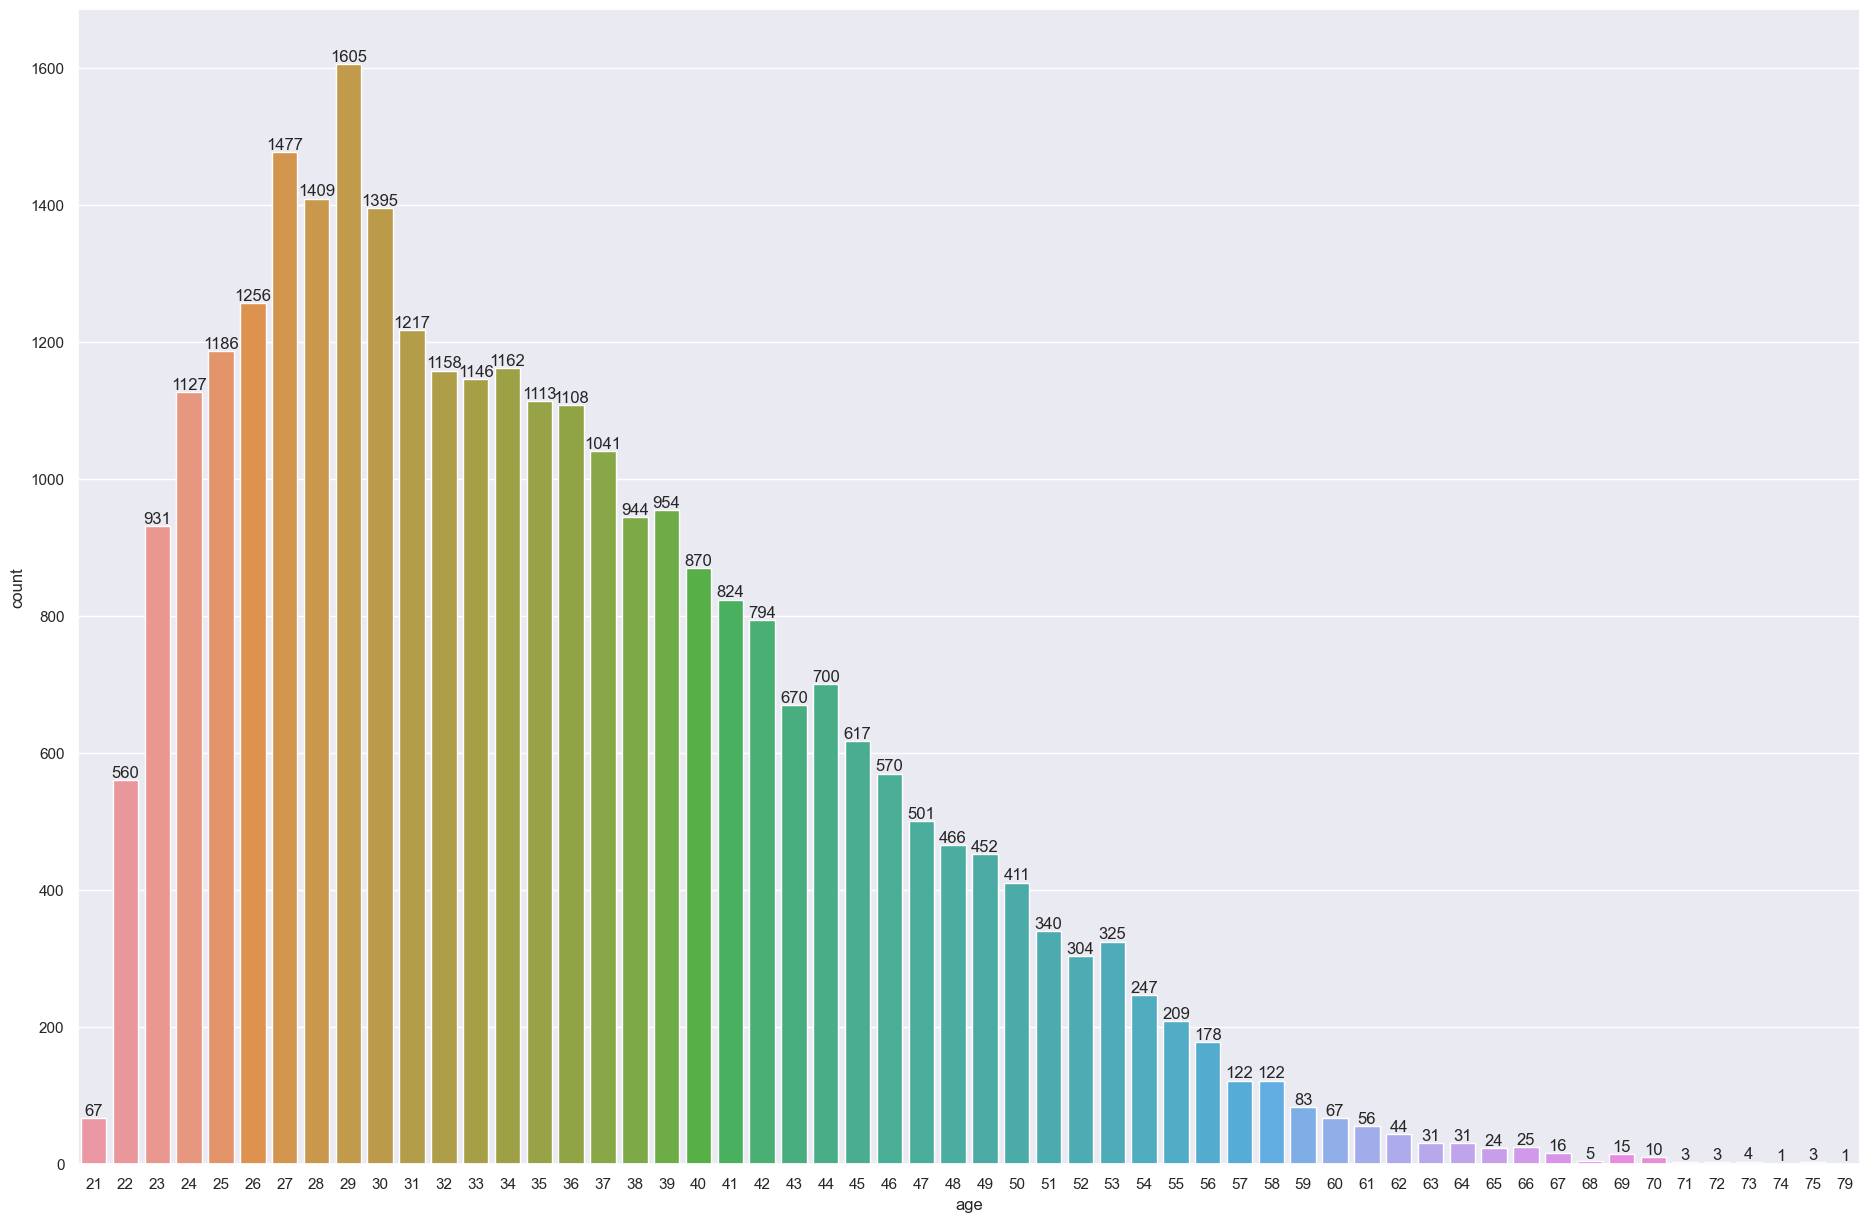

In [22]:

plt.figure(figsize=(23,15))
age_check = sns.countplot(data = df,x = 'age')

# Adding  data labels to have idea of the distribution
for p in age_check.patches:
    age_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

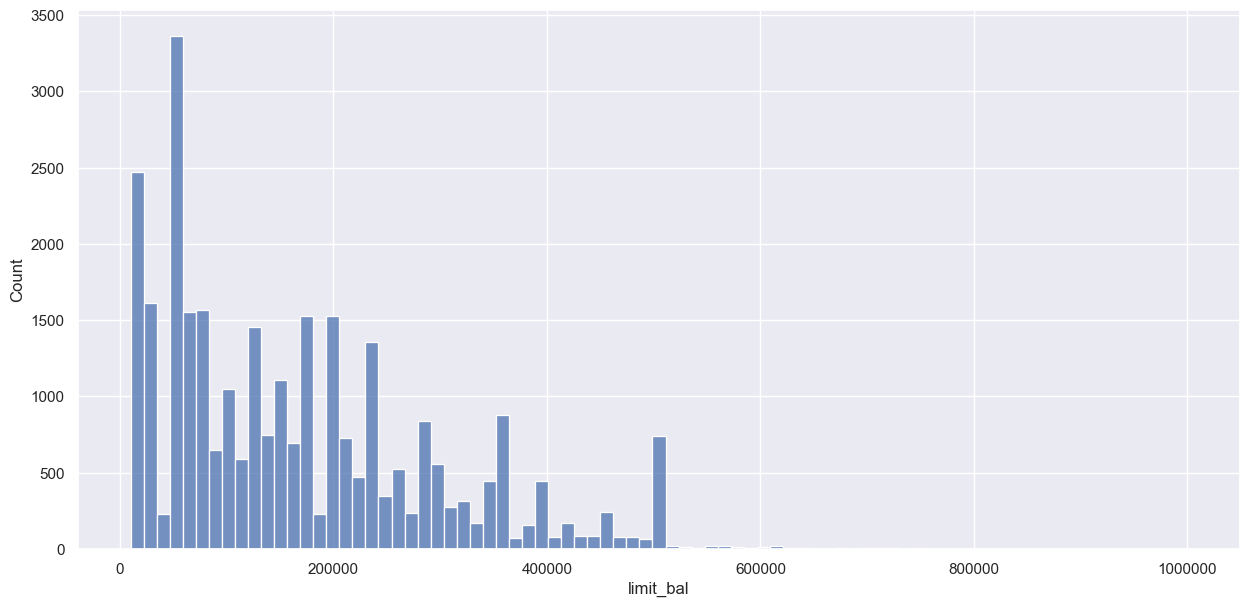

In [23]:
plt.figure(figsize=(15, 7))
sns.histplot(df['limit_bal'])
plt.ticklabel_format(style='plain', axis='x')

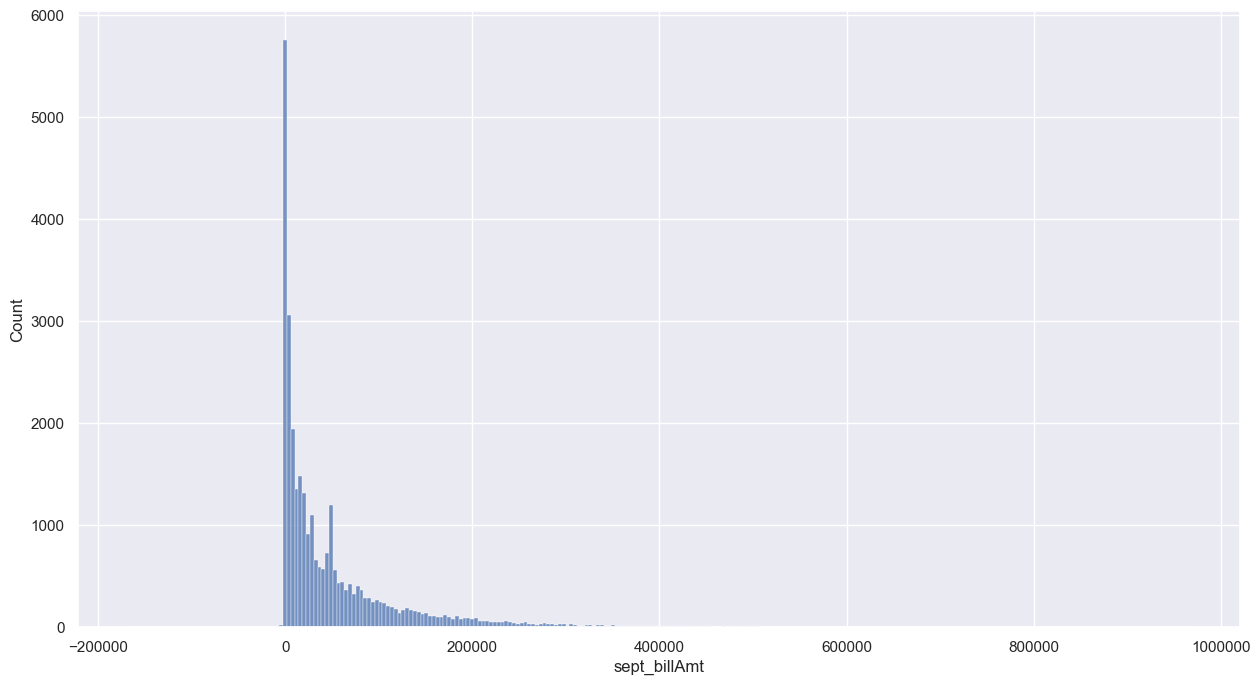

In [24]:
plt.figure(figsize=(15, 8))
sns.histplot(df['sept_billAmt'])
plt.ticklabel_format(style='plain', axis='x')

#### EDA on  Relationships of features with target variable


<Axes: xlabel='default_payment_next_month', ylabel='age'>

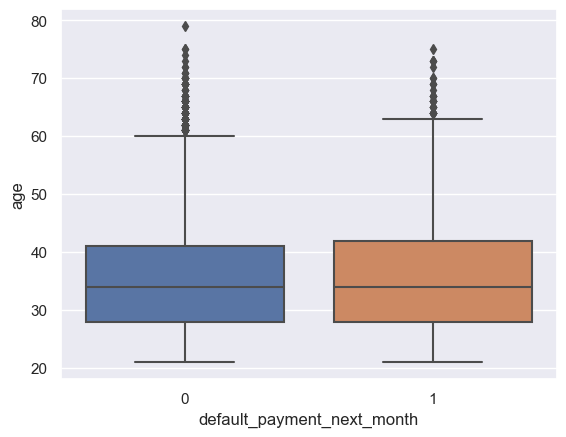

In [25]:

# observing the relationship between age and my target variable.
sns.boxplot(data = df,x='default_payment_next_month',y='age')

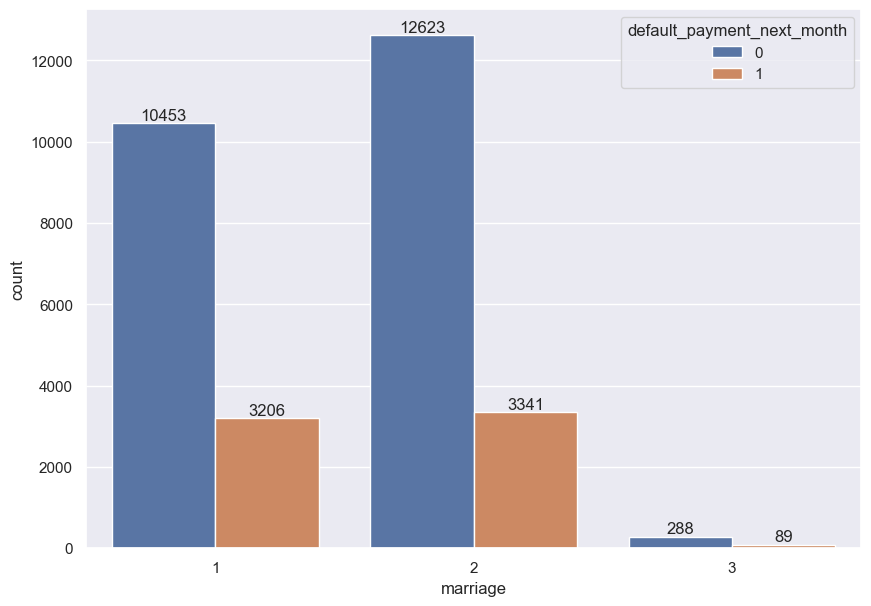

In [26]:

# observing the relationship between marriage and my target variable
plt.figure(figsize=(10,7))
marriage_target = sns.countplot(data = df,x = 'marriage',hue = 'default_payment_next_month')

# Adding a  data labels to have idea of our  target count in each feature
for p in marriage_target.patches:
    marriage_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

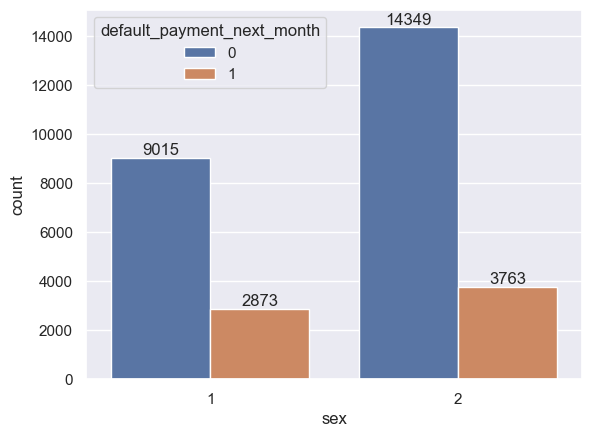

In [27]:

# observing the relationship between sex and my target variable

gender_target = sns.countplot(data = df,x = 'sex',hue = 'default_payment_next_month')

# Adding a  data labels to have idea of our  target count in each feature
for p in gender_target.patches:
    gender_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

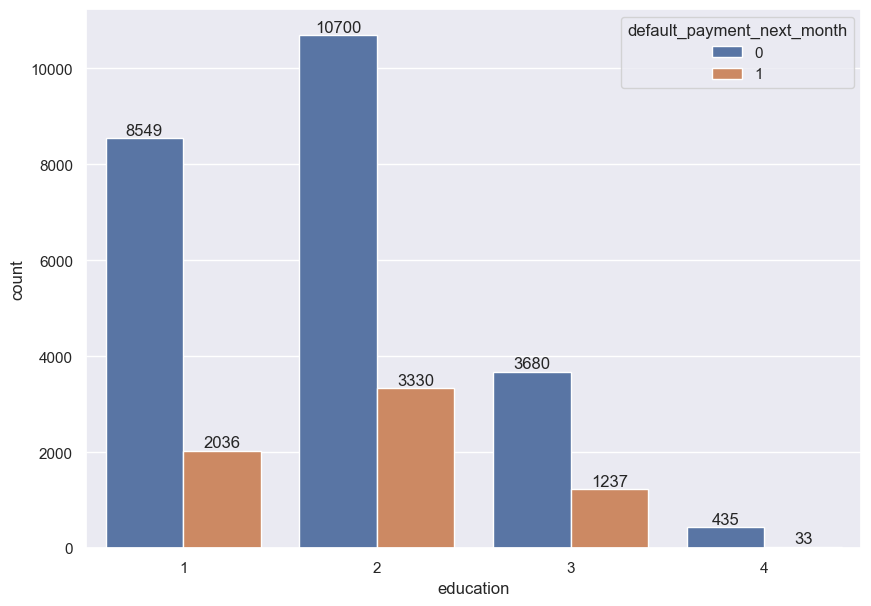

In [28]:

# observing the relationship between education and my target variable

plt.figure(figsize = (10,7))
education_target = sns.countplot(data = df,x = 'education',hue = 'default_payment_next_month')

# Adding a  data labels to have idea of our  target count in each feature
for p in education_target.patches:
    education_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

<Axes: xlabel='default_payment_next_month', ylabel='limit_bal'>

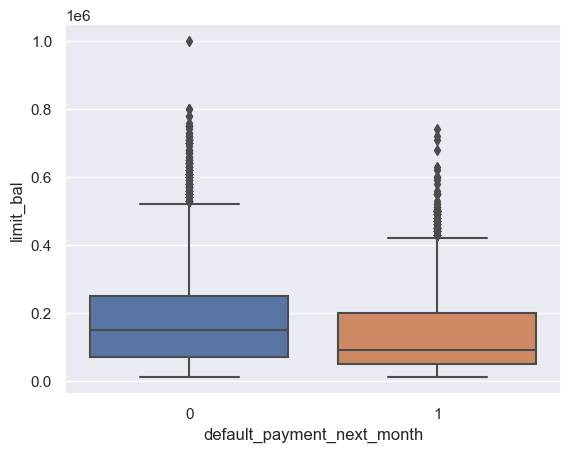

In [29]:
# Observing the relationship between limit_bal and the target variable.

sns.boxplot(data = df,x='default_payment_next_month',y='limit_bal')

In [30]:
## checking correlation between my features and target 
correlation = df.corr()
correlation

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
default_payment_next_month,1.000000,-0.013952,-0.153520,-0.039961,0.033842,-0.027575,0.013890,0.405888,0.337926,0.294250,0.277108,0.268506,0.248721,-0.019644,-0.014193,-0.014076,-0.010156,-0.006760,-0.005372,-0.072929,-0.058579,-0.056250,-0.056827,-0.055124,-0.053183
id,-0.013952,1.000000,0.026179,0.018497,0.037659,-0.028208,0.018678,-0.021899,-0.008548,-0.013842,0.018122,-0.023218,-0.036894,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
limit_bal,-0.153520,0.026179,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.173384,-0.201574,-0.196251,-0.186765,-0.175676,-0.173255,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
sex,-0.039961,0.018497,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.030044,-0.042654,-0.039931,-0.037624,-0.036213,-0.029503,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
education,0.033842,0.037659,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.050111,0.062115,0.053888,0.051631,0.037780,0.025473,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061
marriage,-0.027575,-0.028208,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.013207,-0.009228,0.001101,-0.004750,-0.004065,0.002709,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383
age,0.013890,0.018678,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.002972,-0.010142,-0.015111,-0.007804,-0.015500,-0.020482,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
sept_repayment,0.405888,-0.021899,-0.173384,-0.030044,0.050111,-0.013207,-0.002972,1.000000,0.686767,0.478481,0.421818,0.397292,0.355798,-0.027646,-0.016675,-0.010721,-0.001298,0.008160,0.008692,-0.085314,-0.059867,-0.067734,-0.066072,-0.063072,-0.058751
aug_repayment,0.337926,-0.008548,-0.201574,-0.042654,0.062115,-0.009228,-0.010142,0.686767,1.000000,0.643024,0.495263,0.456184,0.407555,0.006455,0.010544,0.018219,0.027870,0.035880,0.038086,-0.099758,-0.054462,-0.060350,-0.054332,-0.050415,-0.044787
july_repayment,0.294250,-0.013842,-0.196251,-0.039931,0.053888,0.001101,-0.015111,0.478481,0.643024,1.000000,0.644011,0.501369,0.448736,-0.022387,-0.001573,0.001858,0.016755,0.026666,0.029655,-0.038685,-0.076000,-0.057998,-0.053828,-0.051673,-0.049676


<Axes: >

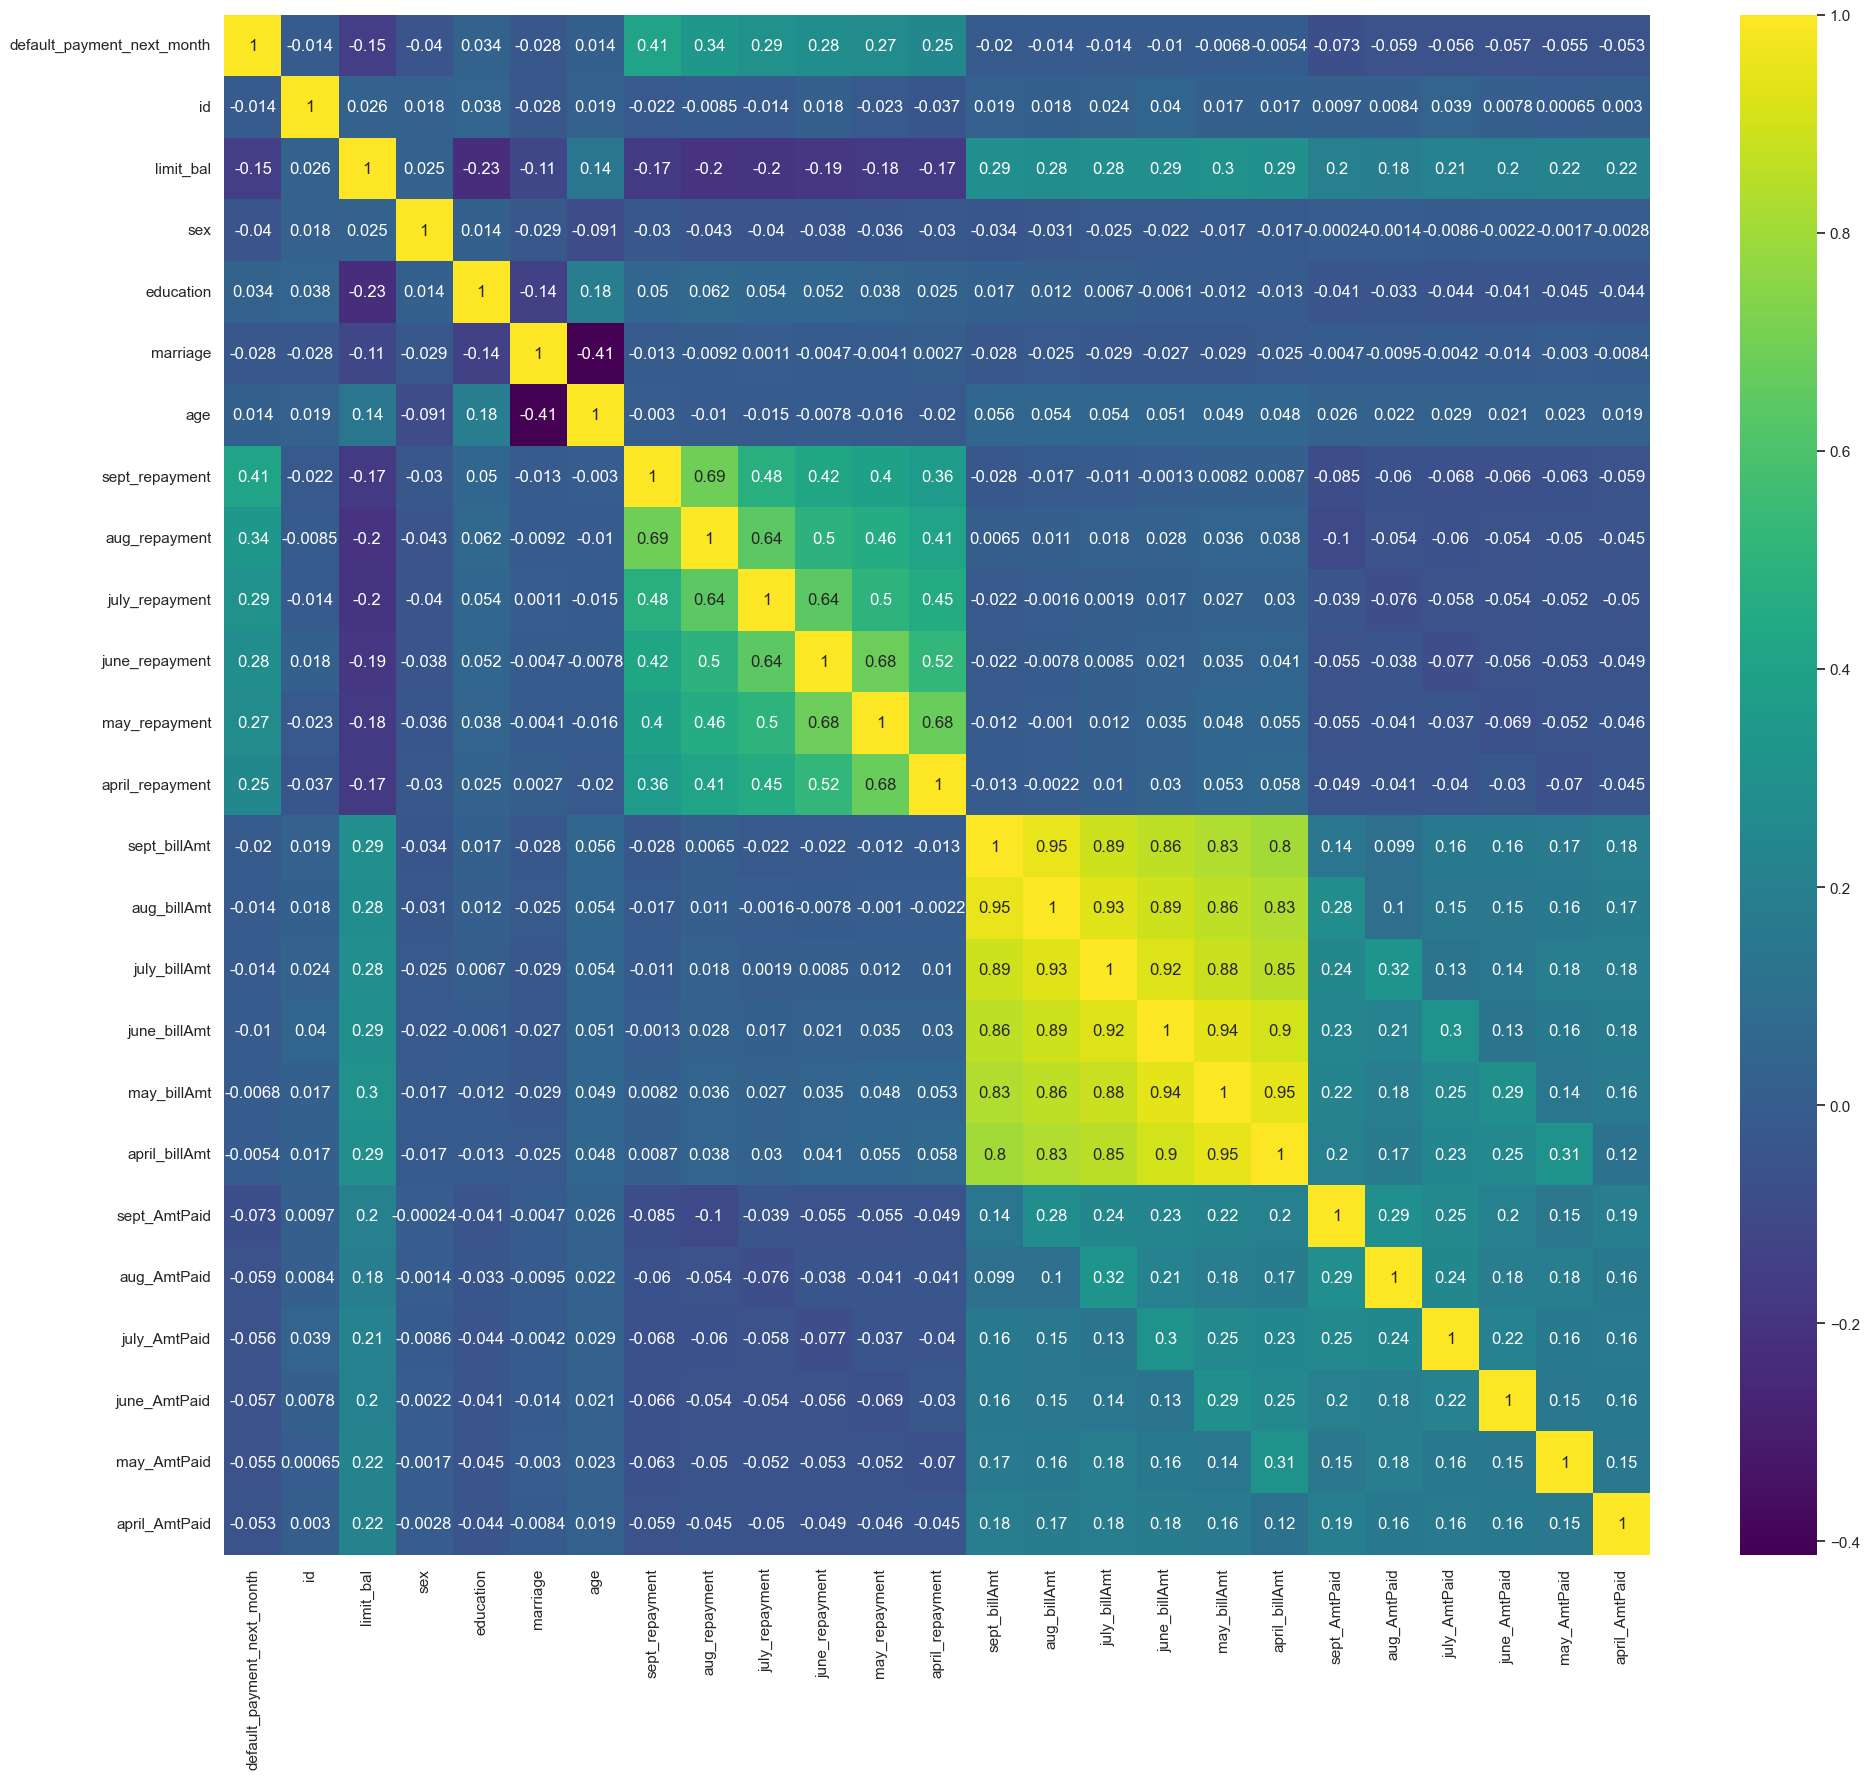

In [31]:
plt.figure(figsize=(23,20))

sns.heatmap(correlation,annot = True,cmap= 'viridis')

#####  it's evident most of my features aint correlated with  the target variable which might be a problem in getting a good model with a good cross value score. i would have to do some feature extraction later on. 

<Axes: >

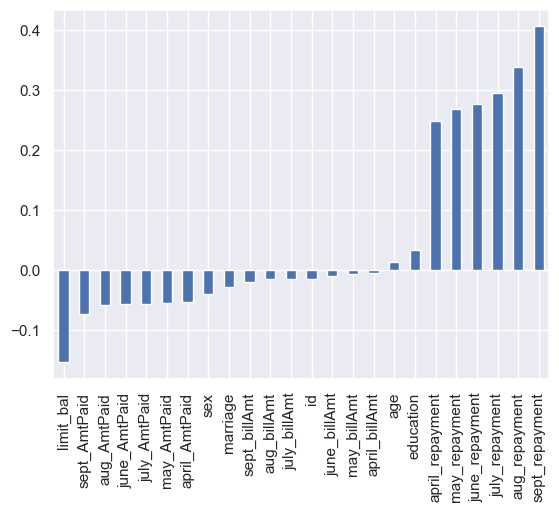

In [32]:
# Using bar plot to further visualize the correlated features 

df.corr()['default_payment_next_month'].sort_values().drop('default_payment_next_month').plot(kind ='bar')

# Section 2: Data preprocessing

In [33]:
len(df)

30000

In [34]:
df.shape

(30000, 25)

In [35]:
df.drop('id', axis=1, inplace=True)

In [36]:
df.head()

,default_payment_next_month,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
0,1,20000,2,2,1,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,-1,-1,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,-1,-1,-1,-1,-1,-1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,-1,-1,-1,-1,-1,-1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,-1,-1,-1,-1,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default_payment_next_month,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
marriage,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
sept_repayment,30000.0,-0.425700,1.099539,-1.0,-1.00,-1.0,-1.00,3.0
aug_repayment,30000.0,-0.541033,1.108523,-1.0,-1.00,-1.0,-1.00,3.0
july_repayment,30000.0,-0.565833,1.079709,-1.0,-1.00,-1.0,-1.00,3.0
june_repayment,30000.0,-0.637433,1.001339,-1.0,-1.00,-1.0,-1.00,3.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default_payment_next_month  30000 non-null  int64
 1   limit_bal                   30000 non-null  int64
 2   sex                         30000 non-null  int64
 3   education                   30000 non-null  int64
 4   marriage                    30000 non-null  int64
 5   age                         30000 non-null  int64
 6   sept_repayment              30000 non-null  int64
 7   aug_repayment               30000 non-null  int64
 8   july_repayment              30000 non-null  int64
 9   june_repayment              30000 non-null  int64
 10  may_repayment               30000 non-null  int64
 11  april_repayment             30000 non-null  int64
 12  sept_billAmt                30000 non-null  int64
 13  aug_billAmt                 30000 non-null  int64
 14  july_b

In [39]:
df.isnull().sum()

default_payment_next_month    0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
sept_repayment                0
aug_repayment                 0
july_repayment                0
june_repayment                0
may_repayment                 0
april_repayment               0
sept_billAmt                  0
aug_billAmt                   0
july_billAmt                  0
june_billAmt                  0
may_billAmt                   0
april_billAmt                 0
sept_AmtPaid                  0
aug_AmtPaid                   0
july_AmtPaid                  0
june_AmtPaid                  0
may_AmtPaid                   0
april_AmtPaid                 0
dtype: int64

In [40]:
df.duplicated().sum()

36

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.reset_index(drop=True, inplace=True)

In [43]:
len(df)

29964

### outlier checks

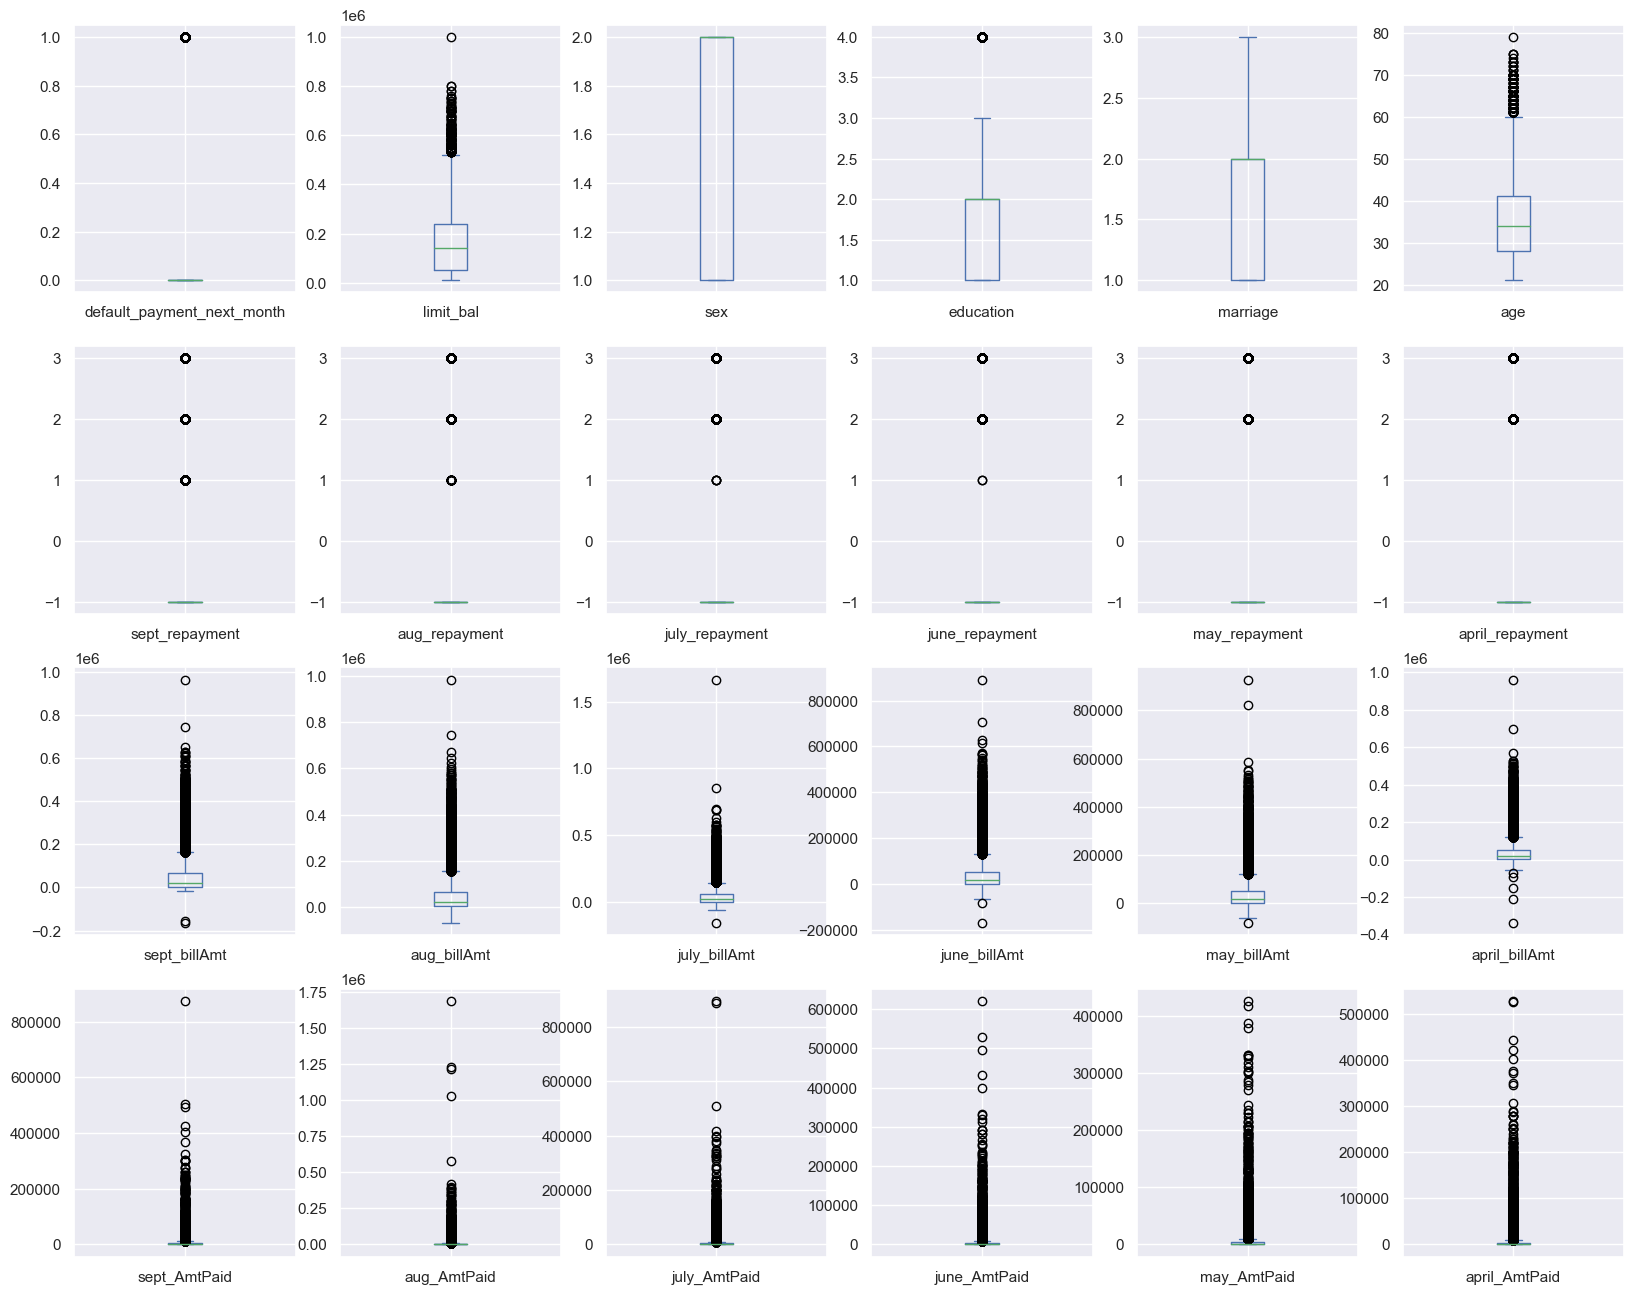

In [44]:
df.plot(
     kind = 'box',
    subplots = True,
    figsize =(20,16),
    layout = (4,6) 
);
   

In [45]:
# Calculate Q1 and Q3 for each numerical column
df_outlier = df.drop('default_payment_next_month', axis=1)

Q1 =df_outlier.quantile(0.25)
Q3 =df_outlier.quantile(0.75)

IQR = Q3 - Q1

# Determine outlier bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = pd.DataFrame()

for column in df_outlier:
    outlier_mask = (df[column] < lower_bound[column]) | (df[column] > upper_bound[column])
    outliers = pd.concat([outliers, df[column][outlier_mask]], axis=1)


In [46]:
outliers.count()

limit_bal           167
sex                   0
education           468
marriage              0
age                 272
sept_repayment     6796
aug_repayment      4437
july_repayment     4212
june_repayment     3509
may_repayment      2967
april_repayment    3078
sept_billAmt       2386
aug_billAmt        2390
july_billAmt       2469
june_billAmt       2616
may_billAmt        2724
april_billAmt      2688
sept_AmtPaid       2742
aug_AmtPaid        2723
july_AmtPaid       2595
june_AmtPaid       2993
may_AmtPaid        2944
april_AmtPaid      2960
dtype: int64

In [47]:
len(outliers)

18319

#### Visualizing the outlier before and after 1% removal

<Axes: xlabel='limit_bal', ylabel='Density'>

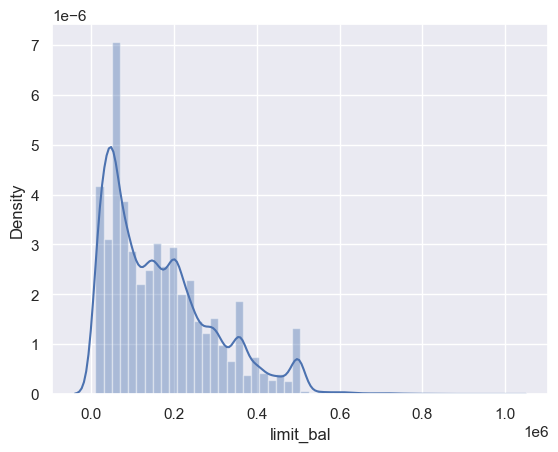

In [48]:
sns.distplot(df['limit_bal'])

In [49]:
# limit_bal
q = df['limit_bal'].quantile(0.99)
data_1 = df[df['limit_bal'] < q]

<Axes: xlabel='limit_bal', ylabel='Density'>

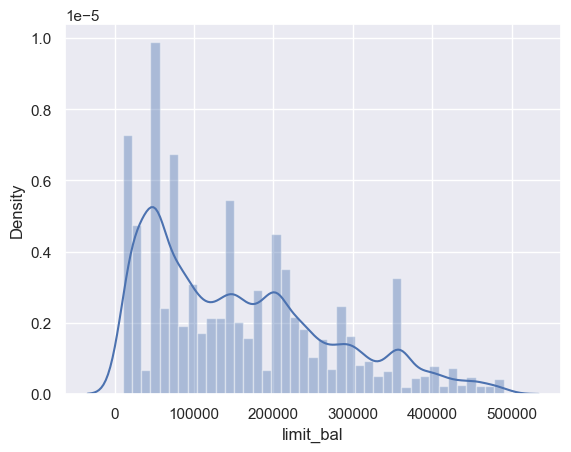

In [50]:
sns.distplot(data_1['limit_bal'])

<Axes: xlabel='age', ylabel='Density'>

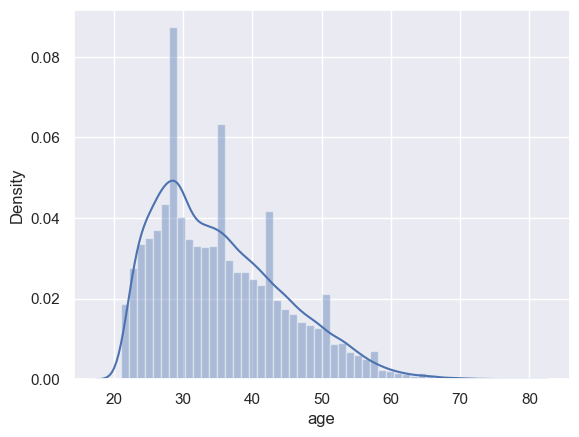

In [51]:
#age
sns.distplot(data_1['age'])

In [52]:
q = data_1['age'].quantile(0.99)
data_2 = data_1[data_1['age'] < q]

<Axes: xlabel='age', ylabel='Density'>

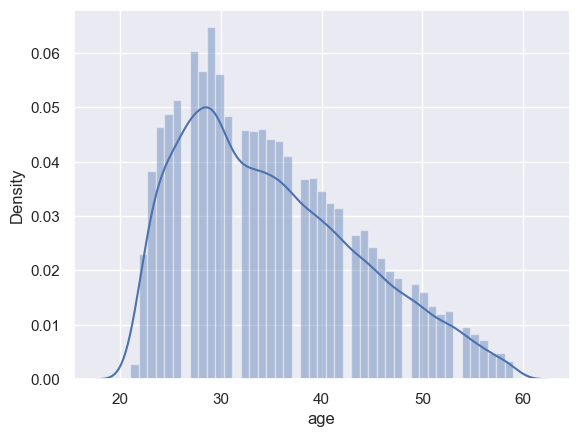

In [53]:
sns.distplot(data_2['age'])

# WEEK 2 & 3: Data Preprocessing cont'd and Model Creation

In [54]:
X = df.drop(['default_payment_next_month'],axis = 1)
y = df['default_payment_next_month']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [57]:
x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Model creation before resampling and hyper-parameters tuning

## Random Forest Classifiier

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train_scaled, y_train)


y_pred_rfc = rfc.predict(x_test_scaled)

print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.67      0.36      0.47      2008

    accuracy                           0.82      8990
   macro avg       0.75      0.66      0.68      8990
weighted avg       0.80      0.82      0.80      8990



In [76]:
from sklearn.model_selection import cross_val_score, GridSearchCV , StratifiedKFold

### Hyper-paramter tuning of Random Forest Classifier

In [77]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [78]:
best_model_rfc = grid_search.best_estimator_

In [79]:
best_model_rfc 

RandomForestClassifier(max_depth=10, n_estimators=200)

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  13.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   8.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=  13.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   8.7s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=  13.2s


In [80]:


y_pred_rfcr =best_model_rfc.predict(x_test_scaled)

In [81]:

print(classification_report(y_test,y_pred_rfcr))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6982
           1       0.69      0.35      0.46      2008

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



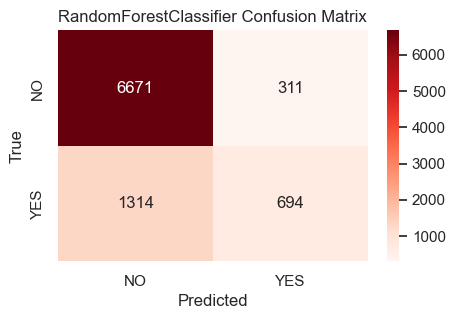

In [82]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rfcr)

cm = confusion_matrix(y_test, y_pred_rfcr)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

## final Evaluation

In [83]:
cv_scores_rfc = cross_val_score(best_model_rfc, x_train_scaled, y_train, cv=5)


In [84]:
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_rfc.mean()*100))


Cross-validation accuracy: 81.86 %


## Voting Classifier

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Define classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
cl_3 = XGBClassifier()
cl_4 = LGBMClassifier()
cl_5 = CatBoostClassifier()
cl_6 = RandomForestClassifier()

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', clf1),
                                          ('dt', clf2),
                                          ('xgb',cl_3),
                                          ('lgb',cl_4),
                                          ('cat',cl_5),
                                         ('rfc',cl_6)],voting='soft')

In [87]:
voting_clf.fit(x_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 4622, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3213
[LightGBM] [Info] Number of data points in the train set: 20974, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220368 -> initscore=-1.263523
[LightGBM] [Info] Start training from score -1.263523
Learning rate set to 0.037783
0:	learn: 0.6716602	total: 8.99ms	remaining: 8.98s
1:	learn: 0.6517831	total: 13.4ms	remaining: 6.7s
2:	learn: 0.6335439	total: 17.7ms	remaining: 5.88s
3:	learn: 0.6170446	total: 21.9ms	remaining: 5.46s
4:	learn: 0.6019878	total: 26.1ms	remaining: 5.19s
5:	learn: 0.5882201	total: 30.4ms	remaining: 5.04s
6:	learn: 0.5752623	total: 34.4ms	remaining: 4.89s
7:	learn: 0.5639708	total: 38.6ms	remaining: 4.79s
8:	lea

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgb', LGBMClassifier()),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x15810ab10>),
                             ('rfc', RandomForestClassifier())],
                 voting='soft')

In [88]:
y_pred_voting_clf = voting_clf.predict(x_test_scaled)


In [89]:

print(classification_report(y_test,y_pred_voting_clf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.67      0.36      0.47      2008

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



### Hyper-parameter tuning of Voting Classifier

In [90]:

# Define classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
cl_3 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
cl_4 = LGBMClassifier(random_state=42)
cl_5 = CatBoostClassifier(random_state=42, silent=True)
cl_6 = RandomForestClassifier(random_state=42)

# Hyperparameter grids
param_grid1 = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

param_grid3 = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid4 = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'boosting_type': ['gbdt', 'dart']
}

param_grid5 = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [6, 8]
}

param_grid6 = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}

# GridSearch for each model
grid1 = GridSearchCV(clf1, param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid2 = GridSearchCV(clf2, param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid3 = GridSearchCV(cl_3, param_grid3, cv=5, scoring='accuracy', n_jobs=-1)
grid4 = GridSearchCV(cl_4, param_grid4, cv=5, scoring='accuracy', n_jobs=-1)
grid5 = GridSearchCV(cl_5, param_grid5, cv=5, scoring='accuracy', n_jobs=-1)
grid6 = GridSearchCV(cl_6, param_grid6, cv=5, scoring='accuracy', n_jobs=-1)

grid1.fit(x_train_scaled, y_train)
grid2.fit(x_train_scaled, y_train)
grid3.fit(x_train_scaled, y_train)
grid4.fit(x_train_scaled, y_train)
grid5.fit(x_train_scaled, y_train)
grid6.fit(x_train_scaled, y_train)

best_clf1 = grid1.best_estimator_
best_clf2 = grid2.best_estimator_
best_clf3 = grid3.best_estimator_
best_clf4 = grid4.best_estimator_
best_clf5 = grid5.best_estimator_
best_clf6 = grid6.best_estimator_

voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_clf1), 
        ('dt', best_clf2), 
        ('xgb', best_clf3), 
        ('lgbm', best_clf4), 
        ('cat', best_clf5), 
        ('rf', best_clf6)
    ],
    voting='soft',  
    weights=[1, 1, 2, 2, 2, 1],  
    n_jobs=-1
)



/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and 

[LightGBM] [Info] Number of positive: 4622, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3213
[LightGBM] [Info] Number of data points in the train set: 20974, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220368 -> initscore=-1.263523
[LightGBM] [Info] Start training from score -1.263523


In [91]:
# Fit Voting Classifier
voting_clf.fit(x_train_scaled, y_train)


y_pred_voting = voting_clf.predict(x_test_scaled)


/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
print(classification_report(y_test,y_pred_voting))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6982
           1       0.70      0.35      0.46      2008

    accuracy                           0.82      8990
   macro avg       0.77      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



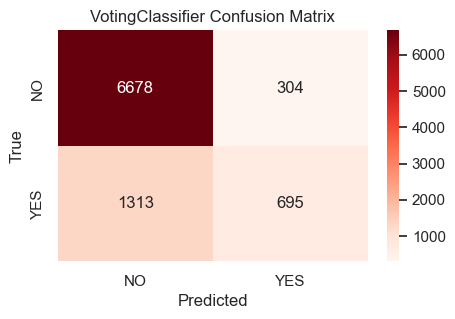

In [93]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_voting)

cm = confusion_matrix(y_test, y_pred_voting)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VotingClassifier Confusion Matrix')
plt.show()

## Final Evaluation

In [95]:
cv_scores_voting = cross_val_score(voting_clf, x_train_scaled, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_voting.mean()*100));

/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Cross-validation accuracy: 82.22 %


## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

# Fit the model


lgr.fit(x_train_scaled, y_train)

# Evaluate the model

y_pred_lgr = lgr.predict(x_test_scaled)

print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6982
           1       0.67      0.32      0.43      2008

    accuracy                           0.81      8990
   macro avg       0.75      0.64      0.66      8990
weighted avg       0.79      0.81      0.79      8990



In [97]:


# Define the Logistic Regression model
lgr = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'C': [0.1, 1, 10, 100],
    'solver': ['saga', 'liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgr,
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model with GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_lgr = grid_search.best_estimator_

# Make predictions with the best model
y_pred_lgrs = best_lgr.predict(x_test_scaled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sot/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and 

In [98]:

print(classification_report(y_test,y_pred_lgrs))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6982
           1       0.67      0.33      0.44      2008

    accuracy                           0.81      8990
   macro avg       0.75      0.64      0.66      8990
weighted avg       0.80      0.81      0.79      8990



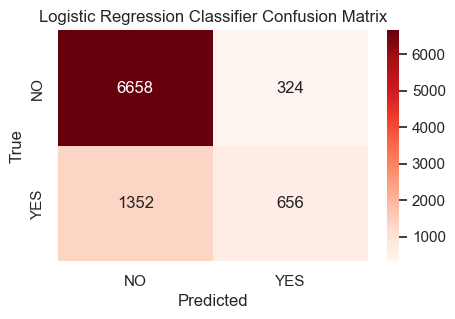

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lgrs)

cm = confusion_matrix(y_test, y_pred_lgrs)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.show()

## Final Evaluation

In [100]:
cv_scores_lgr = cross_val_score(best_lgr, x_train_scaled, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_lgr.mean()*100))

Cross-validation accuracy: 81.64 %


## Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Fit the model
gb_clf.fit(x_train_scaled, y_train)

# Evaluate the model

y_pred_gb_clf = gb_clf.predict(x_test_scaled)

print(classification_report(y_test,y_pred_gb_clf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.68      0.35      0.46      2008

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



In [61]:

gb_cl = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_cl,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_train_scaled, y_train)

best_gb_cl = grid_search.best_estimator_

y_pred_gb_cl = best_gb_cl.predict(x_test_scaled)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [62]:

print(classification_report(y_test,y_pred_gb_cl))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.69      0.34      0.46      2008

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.79      8990



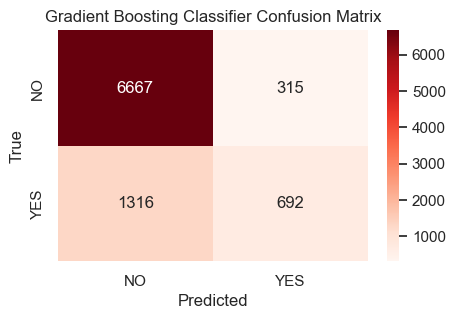

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_gb_cl)

cm = confusion_matrix(y_test,y_pred_gb_cl)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

## Final Evaluation

In [101]:
cv_scores_gb = cross_val_score(best_gb_cl, x_train_scaled, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_gb.mean()*100))

Cross-validation accuracy: 82.22 %


## Catboost Classifier

In [64]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_scaled,y_train)
cat_pred = cat.predict(x_test_scaled)
print(classification_report(y_test,cat_pred))

Learning rate set to 0.037783
0:	learn: 0.6716602	total: 76.2ms	remaining: 1m 16s
1:	learn: 0.6517831	total: 80.2ms	remaining: 40s
2:	learn: 0.6335439	total: 83.9ms	remaining: 27.9s
3:	learn: 0.6170446	total: 87.2ms	remaining: 21.7s
4:	learn: 0.6019878	total: 90.3ms	remaining: 18s
5:	learn: 0.5882201	total: 93.6ms	remaining: 15.5s
6:	learn: 0.5752623	total: 96.7ms	remaining: 13.7s
7:	learn: 0.5639708	total: 100ms	remaining: 12.4s
8:	learn: 0.5531689	total: 104ms	remaining: 11.4s
9:	learn: 0.5433592	total: 107ms	remaining: 10.6s
10:	learn: 0.5346110	total: 110ms	remaining: 9.93s
11:	learn: 0.5261307	total: 114ms	remaining: 9.37s
12:	learn: 0.5184618	total: 117ms	remaining: 8.89s
13:	learn: 0.5111908	total: 121ms	remaining: 8.49s
14:	learn: 0.5049373	total: 124ms	remaining: 8.15s
15:	learn: 0.4989754	total: 128ms	remaining: 7.84s
16:	learn: 0.4935329	total: 131ms	remaining: 7.56s
17:	learn: 0.4885256	total: 134ms	remaining: 7.32s
18:	learn: 0.4839749	total: 137ms	remaining: 7.09s
19:	lea

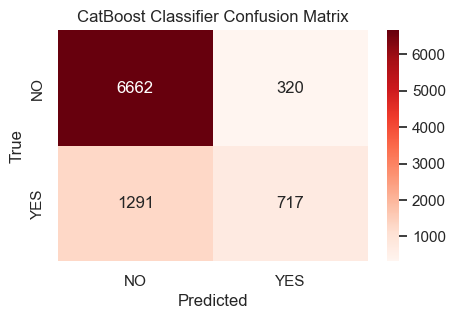

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,cat_pred)

cm = confusion_matrix(y_test,cat_pred)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()

In [69]:

cat = CatBoostClassifier(random_state=42, silent=True)  

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 500],       
    'learning_rate': [0.01, 0.1, 0.2], 
    'depth': [4, 6, 8, 10],             
    'l2_leaf_reg': [1, 3, 5, 7],      
    'border_count': [32, 64, 128],     
    'bagging_temperature': [0, 1, 2]   
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(x_train_scaled, y_train)

best_cat = grid_search.best_estimator_

# Make predictions with the best model
cat_pred = best_cat.predict(x_test_scaled)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


In [70]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.69      0.35      0.47      2008

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



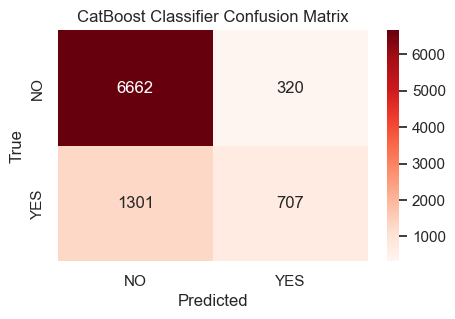

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,cat_pred)

cm = confusion_matrix(y_test,cat_pred)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()

# Final evaluation

In [102]:
cv_scores_cat = cross_val_score(best_cat, x_train_scaled, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_cat.mean()*100))

Cross-validation accuracy: 82.23 %


# Model Creation after resampling 

In [65]:
from imblearn.under_sampling import TomekLinks,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek

def sampler_function(data_x, data_y, sampler = 0, random_state = 42):
    
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    elif sampler == 3:
        sampler = SMOTETomek()
    else: 
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)
    
    return X_transformed, y_transformed

In [66]:
X_train_res, y_train_res = sampler_function(x_train_scaled, y_train,sampler =2)

Original dataset shape: (20974,)
Resample dataset shape: (32704,)


## RandomForest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfc_resampled = RandomForestClassifier()

rfc_resampled.fit(X_train_res, y_train_res)


y_pred_rfc_resampled = rfc.predict(x_test_scaled)

print(classification_report(y_test,y_pred_rfc_resampled))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.67      0.36      0.47      2008

    accuracy                           0.82      8990
   macro avg       0.75      0.66      0.68      8990
weighted avg       0.80      0.82      0.80      8990



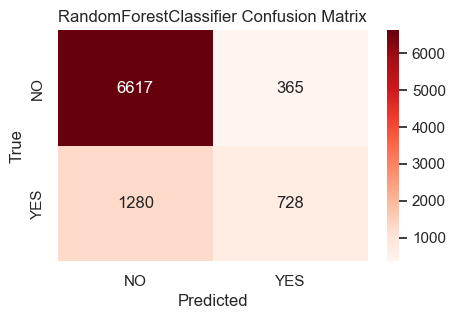

In [105]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rfc)

cm = confusion_matrix(y_test, y_pred_rfc)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

In [107]:
cv_scores_rfc_resampled = cross_val_score(rfc_resampled, X_train_res, y_train_res, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_rfc_resampled.mean()*100))

Cross-validation accuracy: 84.04 %


## Voting Classifier

In [108]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Define classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
cl_3 = XGBClassifier()
cl_4 = LGBMClassifier()
cl_5 = CatBoostClassifier()
cl_6 = RandomForestClassifier()

voting_resampled = VotingClassifier(estimators=[('lr', clf1),
                                          ('dt', clf2),
                                          ('xgb',cl_3),
                                          ('lgb',cl_4),
                                          ('cat',cl_5),
                                         ('rfc',cl_6)],voting='soft')

In [109]:
voting_resampled.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4892
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Learning rate set to 0.045674
0:	learn: 0.6803998	total: 5.65ms	remaining: 5.64s
1:	learn: 0.6696273	total: 11.4ms	remaining: 5.67s
2:	learn: 0.6591321	total: 16.4ms	remaining: 5.44s
3:	learn: 0.6502948	total: 21.9ms	remaining: 5.46s
4:	learn: 0.6415335	total: 27.4ms	remaining: 5.45s
5:	learn: 0.6334817	total: 31.7ms	remaining: 5.25s
6:	learn: 0.6265046	total: 36.5ms	remaining: 5.18s
7:	learn: 0.6203350	total: 41.2ms	remaining: 5.11s
8:	learn: 0.6144563	total: 45.7ms	remaining: 5.03s
9:	learn

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgb', LGBMClassifier()),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x15c61b810>),
                             ('rfc', RandomForestClassifier())],
                 voting='soft')

In [110]:
y_pred_voting_resampled = voting_resampled.predict(x_test_scaled)
print(classification_report(y_test,y_pred_voting_resampled))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6982
           1       0.58      0.46      0.52      2008

    accuracy                           0.81      8990
   macro avg       0.72      0.68      0.70      8990
weighted avg       0.79      0.81      0.80      8990



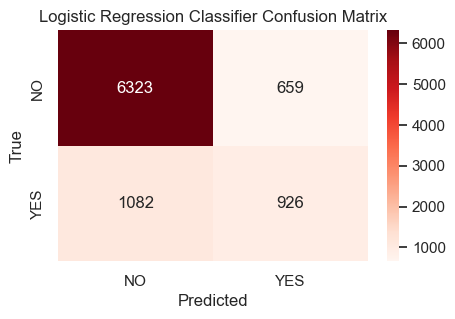

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_voting_resampled)

cm = confusion_matrix(y_test, y_pred_voting_resampled)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.show()

## Final Evaluation

In [113]:
cv_scores_voting_resampled = cross_val_score(voting_resampled, X_train_res, y_train_res, cv=5)


[LightGBM] [Info] Number of positive: 13081, number of negative: 13082
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4891
[LightGBM] [Info] Number of data points in the train set: 26163, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499981 -> initscore=-0.000076
[LightGBM] [Info] Start training from score -0.000076
Learning rate set to 0.041523
0:	learn: 0.6809412	total: 4.83ms	remaining: 4.83s
1:	learn: 0.6701765	total: 9.83ms	remaining: 4.91s
2:	learn: 0.6604130	total: 15.1ms	remaining: 5.02s
3:	learn: 0.6511109	total: 20.3ms	remaining: 5.07s
4:	learn: 0.6425000	total: 25.6ms	remaining: 5.09s
5:	learn: 0.6356619	total: 31.4ms	remaining: 5.21s
6:	learn: 0.6271679	total: 37.9ms	remaining: 5.38s
7:	learn: 0.6198709	total: 43.7ms	remaining: 5.42s
8:	l

In [114]:
cv_scores_voting_resampled

array([0.68062987, 0.83779239, 0.90689497, 0.90475462, 0.90198777])

In [115]:
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_voting_resampled.mean()*100))

Cross-validation accuracy: 84.64 %


## LogisticRegression

In [117]:
from sklearn.linear_model import LogisticRegression

lgr_resampled = LogisticRegression()

# Fit the model


lgr_resampled.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_lgr_resampled = lgr_resampled.predict(x_test_scaled)

print(classification_report(y_test,y_pred_lgr_resampled))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6982
           1       0.51      0.55      0.53      2008

    accuracy                           0.78      8990
   macro avg       0.69      0.70      0.69      8990
weighted avg       0.79      0.78      0.78      8990



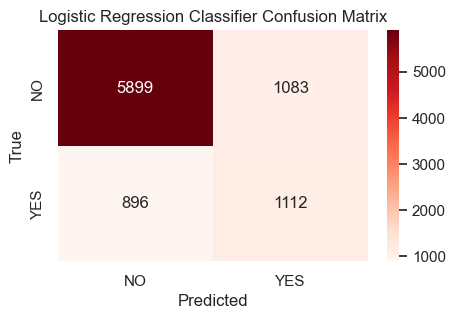

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lgr_resampled)

cm = confusion_matrix(y_test, y_pred_lgr_resampled)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.show()

# Final Evaluation 

In [120]:
cv_scores_lgr_resampled = cross_val_score(lgr_resampled, X_train_res, y_train_res, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_lgr_resampled.mean()*100))

Cross-validation accuracy: 70.31 %


## GradientBoostingClassifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

gb_resampled = GradientBoostingClassifier()

gb_resampled.fit(X_train_res, y_train_res)

y_pred_gb_resampled = gb_resampled.predict(x_test_scaled)

print(classification_report(y_test,y_pred_gb_resampled))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6982
           1       0.53      0.52      0.52      2008

    accuracy                           0.79      8990
   macro avg       0.69      0.69      0.69      8990
weighted avg       0.79      0.79      0.79      8990



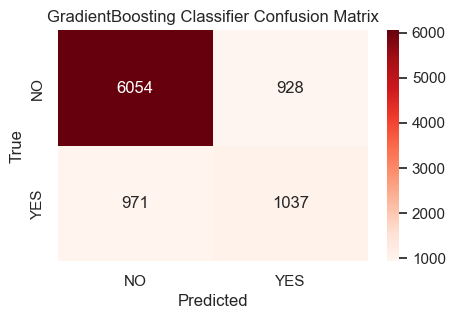

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_gb_resampled)

cm = confusion_matrix(y_test, y_pred_gb_resampled)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GradientBoosting Classifier Confusion Matrix')
plt.show()

## Final Evaluation

In [125]:
cv_scores_gb_resampled = cross_val_score(gb_resampled, X_train_res, y_train_res, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_gb_resampled.mean()*100))

Cross-validation accuracy: 77.76 %


# CatBoost Classifier

In [126]:
from catboost import CatBoostClassifier

cat_resampled = CatBoostClassifier()

cat_resampled.fit(X_train_res,y_train_res)

cat_pred_resampled = cat_resampled.predict(x_test_scaled)

print(classification_report(y_test,cat_pred_resampled))

Learning rate set to 0.045674
0:	learn: 0.6803998	total: 5.19ms	remaining: 5.19s
1:	learn: 0.6696273	total: 10.6ms	remaining: 5.31s
2:	learn: 0.6591321	total: 15.2ms	remaining: 5.06s
3:	learn: 0.6502948	total: 19.5ms	remaining: 4.86s
4:	learn: 0.6415335	total: 24.5ms	remaining: 4.87s
5:	learn: 0.6334817	total: 29.1ms	remaining: 4.83s
6:	learn: 0.6265046	total: 33.7ms	remaining: 4.78s
7:	learn: 0.6203350	total: 38.2ms	remaining: 4.74s
8:	learn: 0.6144563	total: 43.2ms	remaining: 4.76s
9:	learn: 0.6094001	total: 47.6ms	remaining: 4.72s
10:	learn: 0.6049674	total: 52ms	remaining: 4.68s
11:	learn: 0.5995675	total: 56.6ms	remaining: 4.66s
12:	learn: 0.5953143	total: 61.4ms	remaining: 4.66s
13:	learn: 0.5917320	total: 65.9ms	remaining: 4.64s
14:	learn: 0.5882910	total: 70.2ms	remaining: 4.61s
15:	learn: 0.5842564	total: 75.4ms	remaining: 4.64s
16:	learn: 0.5806650	total: 79.8ms	remaining: 4.62s
17:	learn: 0.5773738	total: 84.7ms	remaining: 4.62s
18:	learn: 0.5743460	total: 89.2ms	remaining: 

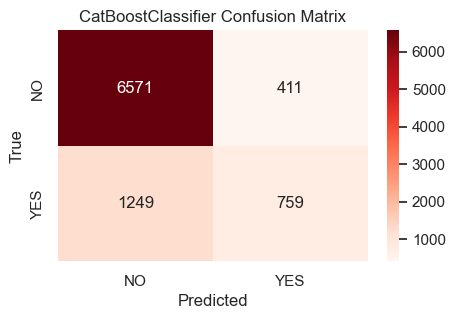

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,cat_pred_resampled)

cm = confusion_matrix(y_test, cat_pred_resampled)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CatBoostClassifier Confusion Matrix')
plt.show()

## Final Evaluation 

In [ ]:
cv_scores_cat_resampled = cross_val_score(cat_resampled, X_train_res, y_train_res, cv=5)

In [129]:
cv_scores_cat_resampled

array([0.61076288, 0.83870968, 0.9445039 , 0.93838863, 0.94204893])

In [130]:
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_cat_resampled.mean()*100))

Cross-validation accuracy: 85.49 %


# Model Summaries

In [143]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_summary_before_resampling = pd.DataFrame(
    {
        'Models': [
            'Voting Classifier',
            'Logistic Regression',
            'Random Forest Classifier',
            'Gradient Boosting Classifier',
            'CatBoost Classifier'
        ],
        'CV Accuracy':[
            cv_scores_voting.mean(),
            cv_scores_lgr.mean(),
            cv_scores_rfc.mean(),
            cv_scores_gb.mean(),
            cv_scores_cat.mean()      
            
        ],
        'Accuracy': [
            accuracy_score(y_test, y_pred_voting_clf),
            accuracy_score(y_test, y_pred_lgrs),
            accuracy_score(y_test, y_pred_rfc),
            accuracy_score(y_test, y_pred_gb_cl),
            accuracy_score(y_test, cat_pred)
        ],
        'Precision': [
            precision_score(y_test, y_pred_voting_clf),
            precision_score(y_test, y_pred_lgrs),
            precision_score(y_test, y_pred_rfc),
            precision_score(y_test, y_pred_gb_cl),
            precision_score(y_test, cat_pred)
        ],
        'Recall': [
            recall_score(y_test, y_pred_voting_clf),
            recall_score(y_test, y_pred_lgrs),
            recall_score(y_test, y_pred_rfc),
            recall_score(y_test, y_pred_gb_cl),
            recall_score(y_test, cat_pred)
        ],
        'F1 Score': [
            f1_score(y_test, y_pred_voting_clf),
            f1_score(y_test, y_pred_lgrs),
            f1_score(y_test, y_pred_rfc),
            f1_score(y_test, y_pred_gb_cl),
            f1_score(y_test, cat_pred)
        ]
    }
)

pred_summary_after_resampling = pd.DataFrame(
    {
        'Models': [
            'Voting Classifier',
            'Logistic Regression',
            'Random Forest Classifier',
            'Gradient Boosting Classifier',
            'CatBoost Classifier'
        ],
        'CV Accuracy':[
                cv_scores_voting_resampled.mean(),
            cv_scores_lgr_resampled.mean(),
            cv_scores_rfc_resampled.mean(),
            cv_scores_gb_resampled.mean(),
            cv_scores_cat_resampled.mean()
                       
        ],
        'Accuracy': [
            accuracy_score(y_test, y_pred_voting_resampled),
            accuracy_score(y_test, y_pred_lgr_resampled),
            accuracy_score(y_test, y_pred_rfc_resampled),
            accuracy_score(y_test, y_pred_gb_resampled),
            accuracy_score(y_test, cat_pred_resampled)
        ],
        'Precision': [
            precision_score(y_test, y_pred_voting_resampled),
            precision_score(y_test, y_pred_lgr_resampled),
            precision_score(y_test, y_pred_rfc_resampled),
            precision_score(y_test, y_pred_gb_resampled),
            precision_score(y_test, cat_pred_resampled)
        ],
        'Recall': [
            recall_score(y_test, y_pred_voting_resampled),
            recall_score(y_test, y_pred_lgr_resampled),
            recall_score(y_test, y_pred_rfc_resampled),
            recall_score(y_test, y_pred_gb_resampled),
            recall_score(y_test, cat_pred_resampled)
        ],
        'F1 Score': [
            f1_score(y_test, y_pred_voting_resampled),
            f1_score(y_test, y_pred_lgr_resampled),
            f1_score(y_test, y_pred_rfc_resampled),
            f1_score(y_test, y_pred_gb_resampled),
            f1_score(y_test, cat_pred_resampled)
        ]
    }
)



In [146]:
pred_summary_before_resampling

,Models,CV Accuracy,Accuracy,Precision,Recall,F1 Score
0,Voting Classifier,0.822209,0.817686,0.673239,0.357072,0.466645
1,Logistic Regression,0.816440,0.813571,0.669388,0.326693,0.439090
2,Random Forest Classifier,0.818633,0.817019,0.666057,0.362550,0.469526
3,Gradient Boosting Classifier,0.822161,0.818576,0.687190,0.344622,0.459038
4,CatBoost Classifier,0.822256,0.819689,0.688413,0.352092,0.465898


In [151]:
pred_summary_after_resampling

,Models,CV Accuracy,Accuracy,Precision,Recall,F1 Score
0,Voting Classifier,0.846412,0.806340,0.584227,0.461155,0.515447
1,Logistic Regression,0.703094,0.779867,0.506606,0.553785,0.529146
2,Random Forest Classifier,0.840387,0.817019,0.666057,0.362550,0.469526
3,Gradient Boosting Classifier,0.777643,0.788765,0.527735,0.516434,0.522024
4,CatBoost Classifier,0.854883,0.815350,0.648718,0.377988,0.477659


## Trying more  techniques by reducing dimensionality

In [152]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(x_train_scaled)
X_test = pca.transform(x_test_scaled)

In [153]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      6982
           1       0.52      0.31      0.39      2008

    accuracy                           0.78      8990
   macro avg       0.67      0.62      0.63      8990
weighted avg       0.75      0.78      0.76      8990



In [154]:
cv_scores_pca = cross_val_score(rfc, X_train, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_pca.mean()*100))

Cross-validation accuracy: 78.12 %


In [92]:
#KERNELPCA 

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel='rbf')
X_train = kpca.fit_transform(x_train_scaled)
X_test = kpca.transform(x_test_scaled)


In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6982
           1       0.50      0.31      0.38      2008

    accuracy                           0.78      8990
   macro avg       0.66      0.61      0.62      8990
weighted avg       0.75      0.78      0.76      8990



In [155]:
#  SELECTKBEST APPLICATION
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaling', MinMaxScaler()), 
    ('feature_selection', SelectKBest(f_classif, k=10)),  
    ('classifier', RandomForestClassifier(random_state=42)) 
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.61      0.35      0.45      1320

    accuracy                           0.81      5993
   macro avg       0.72      0.64      0.66      5993
weighted avg       0.79      0.81      0.79      5993



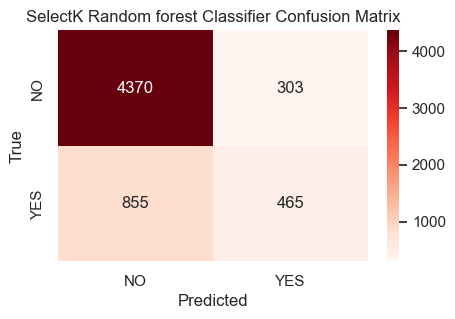

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

cm = confusion_matrix(y_test, y_pred)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SelectK Random forest Classifier Confusion Matrix')
plt.show()

In [157]:

selector = pipeline.named_steps['feature_selection'] 
selected_mask = selector.get_support()

selected_features = X_train.columns[selected_mask]




In [158]:

print("Selected Features:", selected_features)

Selected Features: Index(['limit_bal', 'sept_repayment', 'aug_repayment', 'july_repayment',
       'june_repayment', 'may_repayment', 'april_repayment', 'sept_AmtPaid',
       'aug_AmtPaid', 'june_AmtPaid'],
      dtype='object')


In [159]:
cv_scores_selectK = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_selectK .mean()*100))

Cross-validation accuracy: 80.45 %
